In [18]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
labels = os.listdir("train")
labels

['Closed', 'Open']

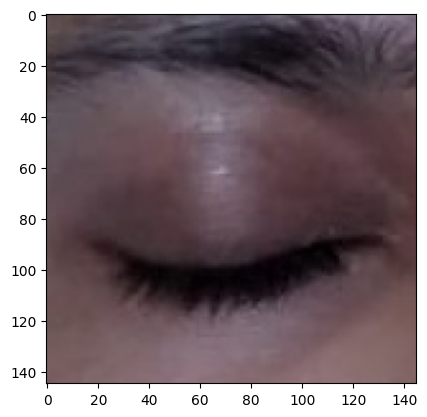

In [3]:
plt.imshow(plt.imread("train/Closed/_0.jpg"))

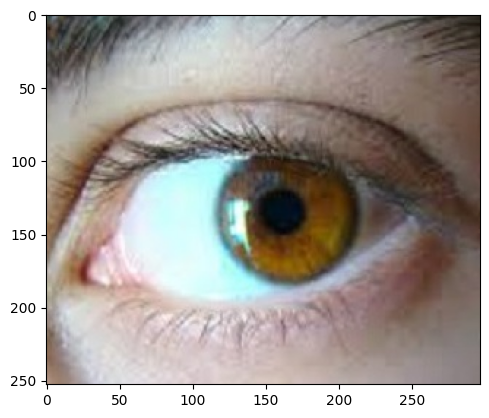

In [5]:
plt.imshow(plt.imread("train/Open/_10.jpg"))

In [22]:
X = []
Y = []

In [25]:
# Load Open Eyes images
for i in tqdm(glob('train/Open/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(1)

# Load Closed Eyes images
for i in tqdm(glob('train/Closed/*')):
    temp = np.array(Image.open(i).resize((64, 64)).convert('L'))  # Convert to grayscale
    X.append(temp)
    Y.append(0)

100%|███████████████████████████████████████████████████████████████████████████████| 726/726 [00:01<00:00, 519.55it/s]


In [26]:
X = np.array(X)
X

array([[[ 78,  84,  86, ..., 130, 130, 131],
        [ 79,  83,  88, ..., 136, 138, 132],
        [ 83,  85,  89, ..., 137, 139, 136],
        ...,
        [103, 107, 110, ..., 111, 110, 107],
        [104, 108, 110, ..., 110, 109, 106],
        [105, 108, 110, ..., 110, 108, 106]],

       [[182, 178, 138, ..., 219, 219, 218],
        [185, 162, 112, ..., 219, 218, 217],
        [172, 126,  84, ..., 218, 218, 217],
        ...,
        [224, 226, 218, ..., 205, 206, 208],
        [226, 227, 219, ..., 205, 206, 208],
        [228, 229, 219, ..., 206, 207, 209]],

       [[ 87, 102,  75, ...,  52,  46,  40],
        [ 79,  81,  65, ...,  45,  40,  35],
        [ 61,  68,  50, ...,  46,  48,  44],
        ...,
        [131, 126, 130, ..., 133, 131, 128],
        [140, 132, 133, ..., 134, 131, 128],
        [150, 137, 135, ..., 134, 131, 128]],

       ...,

       [[203, 204, 202, ..., 103, 101,  85],
        [200, 204, 205, ..., 105, 101,  90],
        [200, 197, 196, ..., 110,  99,  93

In [27]:
X = X/255.0

In [28]:
Y = np.array(Y) #1 IS OPEN, 0 IS CLOSED
Y

array([1, 1, 1, ..., 0, 0, 0])

In [29]:
X.shape

(2178, 64, 64)

In [30]:
X = np.expand_dims(X,-1) # 1 MORE DIMESINSION TO STORE OUTPUIT

In [31]:
X.shape

(2178, 64, 64, 1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D,Dropout, Flatten

In [37]:
model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

In [38]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [63]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='bestModel.h5',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
model.fit(x_train, y_train, validation_split=0.2, epochs=25, batch_size=16, callbacks=[callback,early_stopping])

Epoch 1/25
73/73 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9863
Epoch 1: val_loss improved from inf to 0.27373, saving model to bestModel.h5
73/73 [==============================] - 11s 148ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.2737 - val_accuracy: 0.9247
Epoch 2/25
 1/73 [..............................] - ETA: 8s - loss: 0.0776 - accuracy: 0.9375

C:\Users\gauur\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


73/73 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9649
Epoch 2: val_loss improved from 0.27373 to 0.20278, saving model to bestModel.h5
73/73 [==============================] - 10s 133ms/step - loss: 0.1032 - accuracy: 0.9649 - val_loss: 0.2028 - val_accuracy: 0.9315
Epoch 3/25
73/73 [==============================] - ETA: 0s - loss: 0.0310 - accuracy: 0.9863
Epoch 3: val_loss did not improve from 0.20278
73/73 [==============================] - 9s 125ms/step - loss: 0.0310 - accuracy: 0.9863 - val_loss: 0.3074 - val_accuracy: 0.9315
Epoch 4/25
73/73 [==============================] - ETA: 0s - loss: 0.0690 - accuracy: 0.9837
Epoch 4: val_loss improved from 0.20278 to 0.09868, saving model to bestModel.h5
73/73 [==============================] - 10s 133ms/step - loss: 0.0690 - accuracy: 0.9837 - val_loss: 0.0987 - val_accuracy: 0.9658
Epoch 5/25
73/73 [==============================] - ETA: 0s - loss: 0.0263 - accuracy: 0.9923
Epoch 5: val_loss improved from

In [64]:
model.evaluate(x_test, y_test)

23/23 [==============================] - 1s 40ms/step - loss: 0.0486 - accuracy: 0.9847


[0.0486006923019886, 0.9847009778022766]

In [65]:
from keras.models import load_model
best_model = load_model('bestModel.h5')
best_model.evaluate(x_test, y_test)

23/23 [==============================] - 1s 38ms/step - loss: 0.0118 - accuracy: 0.9958


[0.011805793270468712, 0.9958275556564331]

1/1 [==============================] - 0s 117ms/step


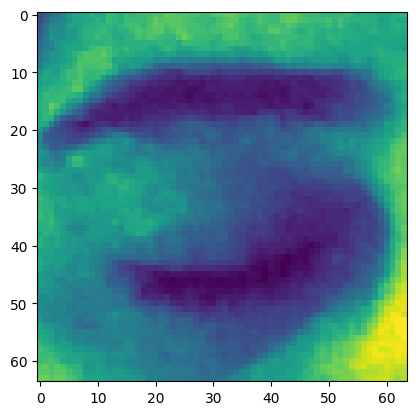

Closed
1/1 [==============================] - 0s 20ms/step


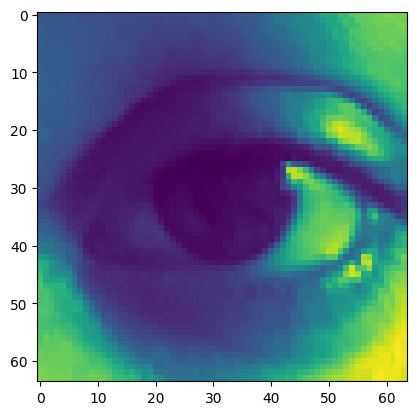

Open
1/1 [==============================] - 0s 22ms/step


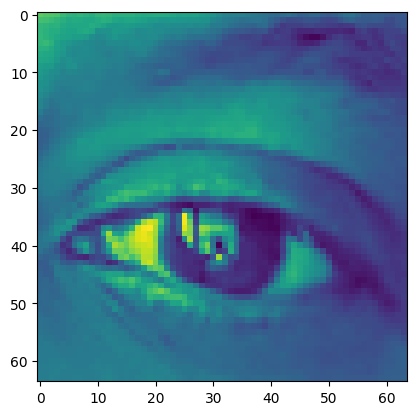

Open
1/1 [==============================] - 0s 22ms/step


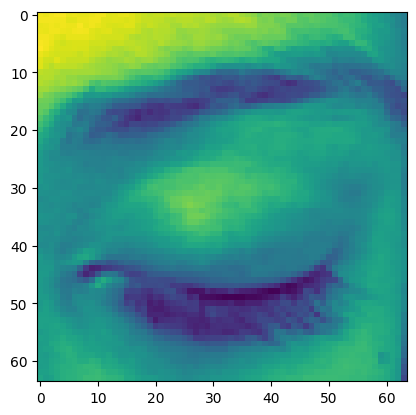

Closed
1/1 [==============================] - 0s 22ms/step


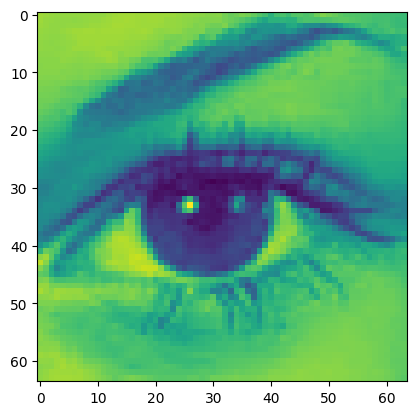

Open


In [66]:
for i in x_test[10:15]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

23/23 [==============================] - 1s 37ms/step


Text(0.5, 25.722222222222214, 'Actual')

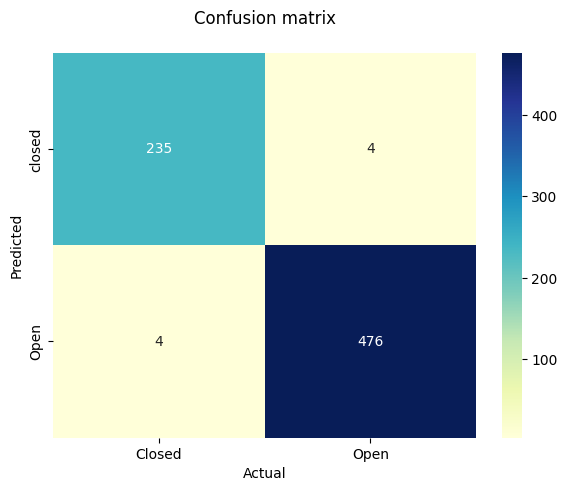

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.50).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

In [68]:
8/719 * 100

1.1126564673157162

In [69]:
from keras.models import load_model
from keras.utils import plot_model
import matplotlib.pyplot as plt

In [79]:
import pydot
import os

# Check if pydot is installed
print("pydot installed:", pydot.__version__)

pydot installed: 3.0.2


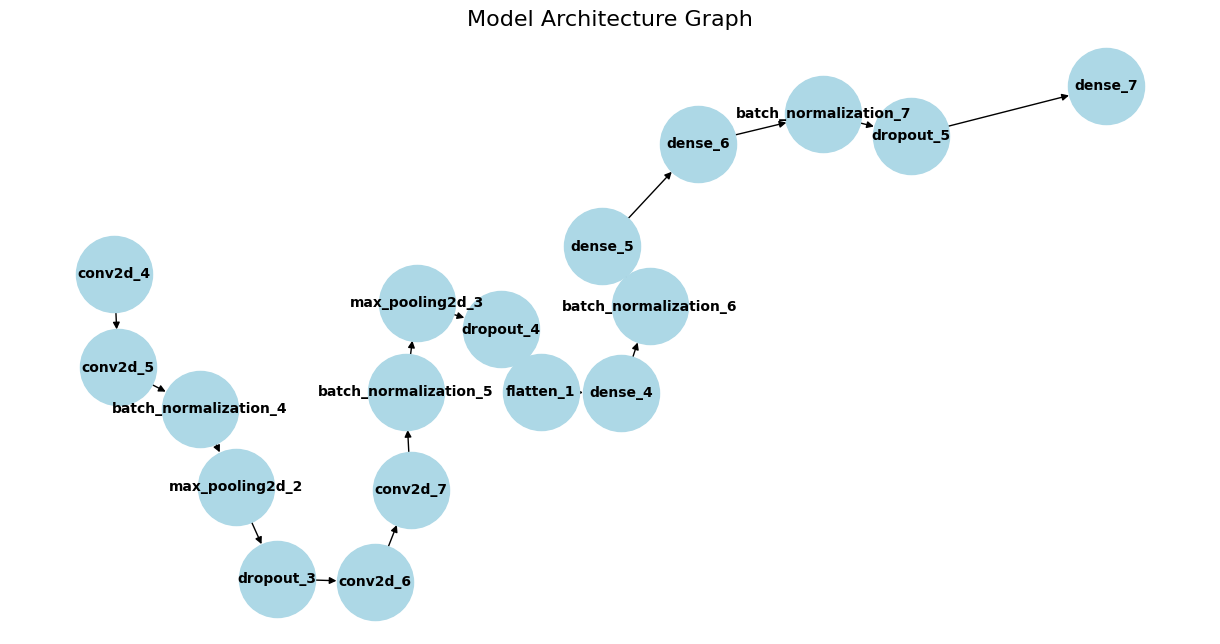

In [84]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_model_with_networkx(model):
    G = nx.DiGraph()

    # Add layers to the graph
    for layer in model.layers:
        G.add_node(layer.name)

    # Add edges (connections between layers)
    for i in range(len(model.layers) - 1):
        G.add_edge(model.layers[i].name, model.layers[i + 1].name)

    plt.figure(figsize=(12, 6))
    pos = nx.spring_layout(G, seed=42)  # positions for all nodes
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='black')
    
    plt.title("Model Architecture Graph", fontsize=16)
    plt.show()

# Example usage
plot_model_with_networkx(best_model)